# Middleware

- Middleware function is basicly a function that takes a request object and either returns a response to the client or passes control to another middleware function. For example **express.json()** method returns a middleware function. Its job is to read the request and if there is a JSON object in the body of the request, it will parse the body into the JSON object and then it will set **req.body** property.

- When we receive a request on the server that request goes through **Request Processing Pipeline** in wich we have one or more middleware functions.

# Creating Custom Middleware

- We will build custom middleware functions for login every request and for authentication. These functions are executed in sequence.
- For a cleaner code, we will create a new module called **logger.js** where we will put the custom middleware functions.
- **next** is a refence to the next middleware function in the pipeline. we use it to pass control to the next middleware fuction in the pipeline as we are not terminating the request response cycle.

In [ ]:
//logger.js
//----------------------------------------------
function log (req, res, next){
    console.log('Logging ...');
    next();
};

function authentication (req, res, next){
    console.log('Authenticating ...');
    next();
};

module.exports.log = log;
module.exports.authentication = authentication;

// index.js
//--------------------------------------------------------
const logger = require('./logger');
const Joi = require('joi'); //return a class
const express = require('express');
const app = express();

app.use(express.json());

app.use(logger.log); // Custom Middleware function
app.use(logger.authentication); // Custom Middleware function

const courses = [
    { id: 1, name: 'course1' },
    { id: 2, name: 'course2' },
    { id: 3, name: 'course3' },
    { id: 4, name: 'course4' },
];
app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send(courses);
}); 

app.post('/api/courses', (req, res) => {
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    const course = {
        id: courses.length + 1,
        name: req.body.name 
    };
    courses.push(course);
    res.send(course);
});

app.put('/api/courses/:id', (req, res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    course.name = req.body.name;
    res.send(course);
});

app.delete('/api/courses/:id', (req, res) => {
    // Lok up the course
    // If not exist return 404
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    // Delete
    const index = courses.indexOf(course);
    courses.splice(index, 1) // Remove 1 object

    // Return the same course
    res.send(course);
});

app.get('/api/courses/:id', (req,res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
    res.send(course);
});

function validateCourse(course){
    const schema = Joi.object({
        name: Joi.string().min(3).required()
    });

    return schema.validate(course);
};

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});

//console
// C:\Users\sebastian\Desktop\nodejs\05_Express Advanced Topics>node index.js

// output
// listening on port 3000...
// Logging ...
// Authenticating ...




# Built-in Middleware

- **express.urlencoded** parses incoming request with url encoded payloads

In [ ]:
//logger.js
//----------------------------------------------
function log (req, res, next){
    console.log('Logging ...');
    next();
};

function authentication (req, res, next){
    console.log('Authenticating ...');
    next();
};

module.exports.log = log;
module.exports.authentication = authentication;

// index.js
//--------------------------------------------------------
const logger = require('./logger');
const Joi = require('joi'); //return a class
const express = require('express');
const app = express();

app.use(express.json());
app.use(express.urlencoded());

app.use(logger.log); // Custom Middleware function
app.use(logger.authentication); // Custom Middleware function

const courses = [
    { id: 1, name: 'course1' },
    { id: 2, name: 'course2' },
    { id: 3, name: 'course3' },
    { id: 4, name: 'course4' },
];
app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send(courses);
}); 

app.post('/api/courses', (req, res) => {
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    const course = {
        id: courses.length + 1,
        name: req.body.name 
    };
    courses.push(course);
    res.send(course);
});

app.put('/api/courses/:id', (req, res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    course.name = req.body.name;
    res.send(course);
});

app.delete('/api/courses/:id', (req, res) => {
    // Lok up the course
    // If not exist return 404
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    // Delete
    const index = courses.indexOf(course);
    courses.splice(index, 1) // Remove 1 object

    // Return the same course
    res.send(course);
});

app.get('/api/courses/:id', (req,res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
    res.send(course);
});

function validateCourse(course){
    const schema = Joi.object({
        name: Joi.string().min(3).required()
    });

    return schema.validate(course);
};

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});

//console
// C:\Users\sebastian\Desktop\nodejs\05_Express Advanced Topics>node index.js

// output
// listening on port 3000...
// Logging ...
// Authenticating ...




- To test *express.urlencoded()* middleware, we send a POST request using **x-www-form-urlencoded** for body. The function was able to read a request with url encoded payload. 

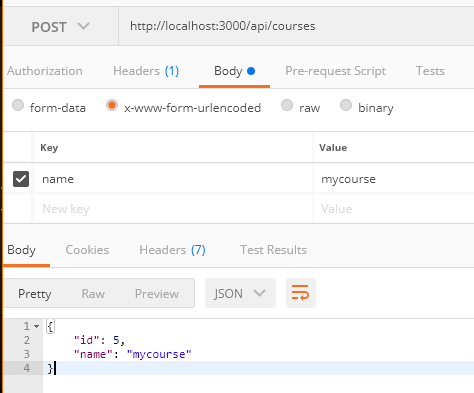

- Another middleware is **static**. The argument is the name of a folder (*'public'* for this case). We can put all static assets like css, images... inside this folder. in this case we create *public* folder where we will put *readme.txt* file

- With this middleware we can serve static content from the route of the site

In [ ]:
// index.js
//--------------------------------------------------------
const logger = require('./logger');
const Joi = require('joi'); //return a class
const express = require('express');
const app = express();

app.use(express.json());
app.use(express.urlencoded({ extended: true }));
app.use(express.static('public'));

app.use(logger.log);
app.use(logger.authentication);

const courses = [
    { id: 1, name: 'course1' },
    { id: 2, name: 'course2' },
    { id: 3, name: 'course3' },
    { id: 4, name: 'course4' },
];
app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send(courses);
}); 

app.post('/api/courses', (req, res) => {
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    const course = {
        id: courses.length + 1,
        name: req.body.name 
    };
    courses.push(course);
    res.send(course);
});

app.put('/api/courses/:id', (req, res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    course.name = req.body.name;
    res.send(course);
});

app.delete('/api/courses/:id', (req, res) => {
    // Lok up the course
    // If not exist return 404
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    // Delete
    const index = courses.indexOf(course);
    courses.splice(index, 1) // Remove 1 object

    // Return the same course
    res.send(course);
});

app.get('/api/courses/:id', (req,res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
    res.send(course);
});

function validateCourse(course){
    const schema = Joi.object({
        name: Joi.string().min(3).required()
    });

    return schema.validate(course);
};

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});

//console
// C:\Users\sebastian\Desktop\nodejs\05_Express Advanced Topics>node index.js

// output
// listening on port 3000...
// Logging ...
// Authenticating ...

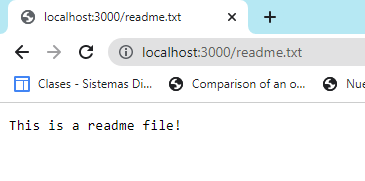

# Third Paty Middleware

- In **express.com** *-> Resources -> Middleware* we can find third party middleware
- One useful middleware is **helmet**. This function helps the apps by setting various HTTP headers.
- Another useful middleware is **morgan**. We use it to log HTTP request. For this we specify simplest format **tiny**

In [ ]:
// index.js
//--------------------------------------------------------
const morgan = require('morgan');
const helmet = require('helmet');
const logger = require('./logger');
const Joi = require('joi'); //return a class
const express = require('express');
const app = express();

app.use(express.json());
app.use(express.urlencoded({ extended: true }));
app.use(express.static('public'));
app.use(helmet());
app.use(morgan('tiny'));

app.use(logger.log);
app.use(logger.authentication);

const courses = [
    { id: 1, name: 'course1' },
    { id: 2, name: 'course2' },
    { id: 3, name: 'course3' },
    { id: 4, name: 'course4' },
];
app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send(courses);
}); 

app.post('/api/courses', (req, res) => {
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    const course = {
        id: courses.length + 1,
        name: req.body.name 
    };
    courses.push(course);
    res.send(course);
});

app.put('/api/courses/:id', (req, res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    course.name = req.body.name;
    res.send(course);
});

app.delete('/api/courses/:id', (req, res) => {
    // Lok up the course
    // If not exist return 404
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    // Delete
    const index = courses.indexOf(course);
    courses.splice(index, 1) // Remove 1 object

    // Return the same course
    res.send(course);
});

app.get('/api/courses/:id', (req,res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
    res.send(course);
});

function validateCourse(course){
    const schema = Joi.object({
        name: Joi.string().min(3).required()
    });

    return schema.validate(course);
};

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});

//console
// C:\Users\sebastian\Desktop\nodejs\05_Express Advanced Topics>node index.js


// output
// listening on port 3000...
// Logging ...
// Authenticating ...
// DELETE /api/courses/2 200 25 - 4.489 ms


- In **DELETE /api/courses/2 200 25 - 4.489 ms**, the  status code **200** means succesfull, and the other parameter its the time it took to respond the request

# Environment

- We need to know what environment our code is running on, i.e, development environment or production environment.  
- **process.env.NODE_ENV** is an environment variable that returns the environment of the node application. If it is not set, returns *undefined*. 
- **app.get('env')** method internally uses previos environment variable. By default it returns *development* 
- We are going to enable logging of HTTP reques only on a development machine.

- When we set **NODE_ENV=production** on console, morgan is not enabled

In [ ]:
// index.js
//--------------------------------------------------------
const morgan = require('morgan');
const helmet = require('helmet');
const logger = require('./logger');
const Joi = require('joi'); //return a class
const express = require('express');
const app = express();

app.use(express.json());
app.use(express.urlencoded({ extended: true }));
app.use(express.static('public'));
app.use(helmet());

if (app.get('env') === 'development'){
    app.use(morgan('tiny'));
    console.log('Morgan Enabled...');    
}

app.use(logger.log);
app.use(logger.authentication);

const courses = [
    { id: 1, name: 'course1' },
    { id: 2, name: 'course2' },
    { id: 3, name: 'course3' },
    { id: 4, name: 'course4' },
];
app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send(courses);
}); 

app.post('/api/courses', (req, res) => {
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    const course = {
        id: courses.length + 1,
        name: req.body.name 
    };
    courses.push(course);
    res.send(course);
});

app.put('/api/courses/:id', (req, res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    course.name = req.body.name;
    res.send(course);
});

app.delete('/api/courses/:id', (req, res) => {
    // Lok up the course
    // If not exist return 404
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    // Delete
    const index = courses.indexOf(course);
    courses.splice(index, 1) // Remove 1 object

    // Return the same course
    res.send(course);
});

app.get('/api/courses/:id', (req,res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
    res.send(course);
});

function validateCourse(course){
    const schema = Joi.object({
        name: Joi.string().min(3).required()
    });

    return schema.validate(course);
};

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});

//console
// C:\Users\sebastian\Desktop\nodejs\05_Express Advanced Topics>node index.js

// output
// Morgan Enabled...
// listening on port 3000...

//console 
// C:\Users\sebastian\Desktop\nodejs\05_Express Advanced Topics>set NODE_ENV=production

//console
// C:\Users\sebastian\Desktop\nodejs\05_Express Advanced Topics>node index.js

// output
// listening on port 3000...


# Configuration

- We are going to know how to store configuration settings for the application and override them. 
For example in the development environment we can use different database or mail server

- We create a folder named **config**. iniside this folder we create following configuration files:
- In *default.json* we define the default configuration settings.
- In *development.json* file we define the settings specific to the development environment. We can also override the setings defined in *default.json*

- When we set **NODE_ENV=development** on console, we can see that development configuration is loaded.


In [ ]:
// index.js
//--------------------------------------------------------
const config = require('config');
const morgan = require('morgan');
const helmet = require('helmet');
const logger = require('./logger');
const Joi = require('joi'); //return a class
const express = require('express');
const app = express();

app.use(express.json());
app.use(express.urlencoded({ extended: true }));
app.use(express.static('public'));
app.use(helmet());

//Configuration
console.log('Application Name:'+ config.get('name'));
console.log('Mail Server:'+ config.get('mail.host'));

if (app.get('env') === 'development'){
    app.use(morgan('tiny'));
    console.log('Morgan Enabled...');    
}

app.use(logger.log);
app.use(logger.authentication);

const courses = [
    { id: 1, name: 'course1' },
    { id: 2, name: 'course2' },
    { id: 3, name: 'course3' },
    { id: 4, name: 'course4' },
];
app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send(courses);
}); 

app.post('/api/courses', (req, res) => {
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    const course = {
        id: courses.length + 1,
        name: req.body.name 
    };
    courses.push(course);
    res.send(course);
});

app.put('/api/courses/:id', (req, res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    course.name = req.body.name;
    res.send(course);
});

app.delete('/api/courses/:id', (req, res) => {
    // Lok up the course
    // If not exist return 404
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    // Delete
    const index = courses.indexOf(course);
    courses.splice(index, 1) // Remove 1 object

    // Return the same course
    res.send(course);
});

app.get('/api/courses/:id', (req,res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
    res.send(course);
});

function validateCourse(course){
    const schema = Joi.object({
        name: Joi.string().min(3).required()
    });

    return schema.validate(course);
};

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});

//console
// C:\Users\sebastian\Desktop\nodejs\05_Express Advanced Topics> set NODE_ENV=development

//console
// C:\Users\sebastian\Desktop\nodejs\05_Express Advanced Topics>node index.js

// output
// Application Name:My Express App - Development
// Mail Server:dev-mail-server
// Morgan Enabled...
// listening on port 3000...

**Secret Information**

- We set pasword environment variale on console: **set app_password=123**. *app** is the name of our application.

- Inside *config* folder we create a new file named **custom-environment-variables.json**, and we set mail password as created environment variale *app_password*

In [ ]:
// index.js
//--------------------------------------------------------
const config = require('config');
const morgan = require('morgan');
const helmet = require('helmet');
const logger = require('./logger');
const Joi = require('joi'); //return a class
const express = require('express');
const app = express();

app.use(express.json());
app.use(express.urlencoded({ extended: true }));
app.use(express.static('public'));
app.use(helmet());

//Configuration
console.log('Application Name:'+ config.get('name'));
console.log('Mail Server:'+ config.get('mail.host'));
console.log('Mail Password:'+ config.get('mail.password'));

if (app.get('env') === 'development'){
    app.use(morgan('tiny'));
    console.log('Morgan Enabled...');    
}

app.use(logger.log);
app.use(logger.authentication);

const courses = [
    { id: 1, name: 'course1' },
    { id: 2, name: 'course2' },
    { id: 3, name: 'course3' },
    { id: 4, name: 'course4' },
];
app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send(courses);
}); 

app.post('/api/courses', (req, res) => {
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    const course = {
        id: courses.length + 1,
        name: req.body.name 
    };
    courses.push(course);
    res.send(course);
});

app.put('/api/courses/:id', (req, res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    course.name = req.body.name;
    res.send(course);
});

app.delete('/api/courses/:id', (req, res) => {
    // Lok up the course
    // If not exist return 404
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    // Delete
    const index = courses.indexOf(course);
    courses.splice(index, 1) // Remove 1 object

    // Return the same course
    res.send(course);
});

app.get('/api/courses/:id', (req,res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
    res.send(course);
});

function validateCourse(course){
    const schema = Joi.object({
        name: Joi.string().min(3).required()
    });

    return schema.validate(course);
};

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});

//console
// C:\Users\sebastian\Desktop\nodejs\05_Express Advanced Topics> set NODE_ENV=production

//console
// C:\Users\sebastian\Desktop\nodejs\05_Express Advanced Topics>node index.js

// output
// Application Name:My Express App - Production
// Mail Server:prod-mail-server
// Mail Password:123
// listening on port 3000...

# Debugging

- A better way to log messages for debugging is to use the debug package. **npm i debug**
- We need to give an arbitrary namespace for debbuging  as argument. For example we can define it as **app:startup**. Then we get a function for writing debugging messages in this namespace. 
- We can have another debugger for debugging database related messages: **startupDebugger('Morgan enabled...');**   

- In the terminal we use an environment variable o determine what kind of debugging information we will see on the console. For example, to see only the debugging messages that are part of the app:startup namespace: **set DEBUG=app:startup**


In [ ]:
// index.js
//--------------------------------------------------------
const startupDebugger = require('debug')('app:startup');
const dbDebugger = require('debug')('app:db');
const morgan = require('morgan');
const express = require('express');
const app = express();

if (app.get('env') === 'development'){
    app.use(morgan('tiny'));
   startupDebugger('Morgan enabled...');   
}

// DB work...
dbDebugger('Connected to the database...');

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});

//console
// C:\Users\sebastian\Desktop\nodejs\05_Express Advanced Topics>node index.js

// output
//   app:startup Morgan enabled... +0ms
// listening on port 3000...

- We also can disable the debugging **set DEBUG=**, or set debugging for multiple namespaces: **set DEBUG=app:startup, app:db** or for all namespaces: **DEBUG=***

- One shortcut is: **DEBUG=app:startup node index.js**

# Templating Engines

- Sometimes we need to return html markups to he client instead of json objects. 
- The most popular engines for express are *pug, muestache EJS*. To install *pug* **npm i pug**
- We need to set the view engine for the app: **app.set('view engine', 'pug' );**. With this, express internally load this module. 
- Another optional setting is **app.set('views', './views')** the property is *views* and the value is the path to where we store the templates. the default value is *./views*.
- We need to add a new folder named *views*, and inside it, create a new file named *index.pug*. 

In [ ]:
// views/index.pug
//-----------------------------------------------------
html
    head    
        title= title 
    body
        h1= message


// index.js
//------------------------------------------------------
const express = require('express');
const app = express();

app.set('view engine', 'pug'); //Templating Engines
app.set('views', './views'); 

app.get('/', (req, res) => { 
    // Return html markup
    res.render('index.pug', { title:'My Express App', message:'Hello'});
});

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});

//console
// C:\Users\sebastian\Desktop\nodejs\05_Express Advanced Topics> set NODE_ENV=production


//Browser
//http://localhost:3000/

// output
// Hello World


# DataBase Integration

- In **expressjs.com > Guide > Database inegration** we can see various database drivers.

 # Authentication

- Authentication is outsite the scope of express because express is a minimal ligthweigth framework and it does not have an opinion about authentication.

# Structuring Express Apps

- We create a new folder called *routes* wich will contain *courses.js*. in this file we put all the code that work with courses 
- In the courses module instead of working with *app* module, we work with **router** object.
- With **app.use('./api/courses', courses)** we are telling express that for any routes that starts with /api/courses use router. Then, we can change the route in the courses.js to **'/'**
- Finally, we create a folder called **middleware** and move *logger.js* inside it.

In [ ]:
//routes/courses.js
//--------------------------------------------------------
const express = require('express');
const router = express.Router();


const courses = [
    { id: 1, name: 'course1' },
    { id: 2, name: 'course2' },
    { id: 3, name: 'course3' },
    { id: 4, name: 'course4' },
];

router.get('/', (req, res) => { 
    res.send(courses);
}); 

router.post('/', (req, res) => {
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    const course = {
        id: courses.length + 1,
        name: req.body.name 
    };
    courses.push(course);
    res.send(course);
});

router.put('/:id', (req, res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    course.name = req.body.name;
    res.send(course);
});

router.delete('/:id', (req, res) => {
    // Lok up the course
    // If not exist return 404
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    // Delete
    const index = courses.indexOf(course);
    courses.splice(index, 1) // Remove 1 object

    // Return the same course
    res.send(course);
});

router.get('/:id', (req,res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
    res.send(course);
});

function validateCourse(course){
    const schema = Joi.object({
        name: Joi.string().min(3).required()
    });

    return schema.validate(course);
};

module.exports = router;


//routes/home.js
//-----------------------------------------------------------------------------
const express = require('express');
const router = express.Router();

router.get('/', (req, res) => { 
    // Return html markup
    res.render('index.pug', { title:'My Express App', message:'Hello'});
}); 

module.exports = router;


// index.js
//--------------------------------------------------------
const startupDebugger = require('debug')('app:startup');
const dbDebugger = require('debug')('app:db');
const config = require('config');
const morgan = require('morgan');
const helmet = require('helmet');
const logger = require('./middleware/logger');
const Joi = require('joi'); //return a class
const courses = require('./routes/courses');
const home = require('./routes/home');
const express = require('express');
const app = express();

app.set('view engine', 'pug'); //Templating Engines
app.set('views', './views'); 

app.use(express.json());
app.use(express.urlencoded({ extended: true }));
app.use(express.static('public'));
app.use(helmet());
app.use('./api/courses', courses)
app.use('/', home);

//Configuration
console.log('Application Name:'+ config.get('name'));
console.log('Mail Server:'+ config.get('mail.host'));
console.log('Mail Password:'+ config.get('mail.password'));

if (app.get('env') === 'development'){
    app.use(morgan('tiny'));
   startupDebugger('Morgan enabled...');   
}

// DB work...
dbDebugger('Connected to the database...');

app.use(logger.log);
app.use(logger.authentication);


const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});


